In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
df = pd.read_csv("../ed2017_data.csv")
df

c:\users\andriansyah-putra\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (249,250,251,663,683,703,723,743,763,783,803,823,843,863,883,903,923) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,VMONTH,VDAYR,ARRTIME,WAITTIME,BLANK1,AGE,AGER,AGEDAYS,RESIDNCE,SEX,...,RX30V3C1,RX30V3C2,RX30V3C3,RX30V3C4,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT,EDWT
0,6,6,2056,72,NaN,27,3,-7,1,2,...,NaN,NaN,NaN,NaN,3,2017,40100000,4,3723.12641,21.58043
1,6,2,1417,64,NaN,1,1,-7,1,1,...,NaN,NaN,NaN,NaN,3,2017,40100000,4,3723.12641,NaN
2,6,2,2303,-7,NaN,52,4,-7,1,2,...,NaN,NaN,NaN,NaN,3,2017,40100000,4,3723.12641,NaN
3,6,5,930,29,NaN,5,1,-7,1,2,...,NaN,NaN,NaN,NaN,3,2017,40100000,4,3723.12641,NaN
4,6,2,1332,20,NaN,4,1,-7,1,1,...,NaN,NaN,NaN,NaN,3,2017,40100000,4,3723.12641,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,7,7,328,8,NaN,24,2,-7,1,2,...,NaN,NaN,NaN,NaN,3,2017,40200000,10,30903.80174,NaN
16705,8,1,1707,23,NaN,36,3,-7,1,1,...,NaN,NaN,NaN,NaN,3,2017,40200000,10,30903.80174,NaN
16706,7,4,1230,96,NaN,40,3,-7,1,2,...,NaN,NaN,NaN,NaN,3,2017,40200000,10,30903.80174,NaN
16707,7,1,235,33,NaN,75,6,-7,1,1,...,NaN,NaN,NaN,NaN,3,2017,40200000,10,30903.80174,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Columns: 949 entries, VMONTH to EDWT
dtypes: float64(576), int64(330), object(43)
memory usage: 121.0+ MB


In [4]:
df.isnull().sum().sum()

9741996

In [5]:
df.dropna(thresh=int(len(df)*0.9), axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Columns: 344 entries, VMONTH to PATWT
dtypes: float64(1), int64(330), object(13)
memory usage: 43.9+ MB


In [6]:
df.isnull().sum().sum()

0

In [7]:
df = df.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)
corr = df.corr()

In [8]:
#Correlation with output variable
corr_target = abs(corr["WAITTIME"])
#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.05]
relevant_features

WAITTIME       1.000000
RACER          0.055658
ECONTSCRIPR    0.055873
EDATAREPER     0.051602
EMSGER         0.056882
EDISCHSRE2     0.050197
EDISCHSRE3     0.059494
KIOSELCHK      0.058043
WIRELESS       0.055019
SURGDAY        0.072025
HLIST          0.066101
Name: WAITTIME, dtype: float64

In [9]:
df["WAITTIME"].describe()

count    16709.000000
mean        32.212161
std         60.872094
min          0.000000
25%          7.000000
50%         12.000000
75%         33.000000
max       1440.000000
Name: WAITTIME, dtype: float64

In [10]:
df[df["WAITTIME"] < 0]

,VMONTH,VDAYR,ARRTIME,WAITTIME,AGE,AGER,AGEDAYS,RESIDNCE,SEX,ETHUN,...,HLIST,HLISTED,EMEDRES,REGION,MSA,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT


In [11]:
age_r = df["AGER"].value_counts().keys()
age_r

for r in sorted(age_r):
    print("AGER: ", r)
    print("Min: ", df[df["AGER"] == r]["AGE"].min())
    print("Max: ", df[df["AGER"] == r]["AGE"].max(),"\n")

AGER:  1
Min:  0
Max:  14 

AGER:  2
Min:  15
Max:  24 

AGER:  3
Min:  25
Max:  44 

AGER:  4
Min:  45
Max:  64 

AGER:  5
Min:  65
Max:  74 

AGER:  6
Min:  75
Max:  93 



In [12]:
df.drop(df.loc[df['WAITTIME']<=0].index, inplace=True)
df["WAITTIME"].describe()

count    16085.000000
mean        33.461797
std         61.703732
min          1.000000
25%          8.000000
50%         13.000000
75%         34.000000
max       1440.000000
Name: WAITTIME, dtype: float64

In [13]:
df = df[((df["WAITTIME"] - df["WAITTIME"].mean()) / df["WAITTIME"].std()).abs() < 2]
df["WAITTIME"].describe()

count    15529.000000
mean        24.791616
std         28.905159
min          1.000000
25%          8.000000
50%         12.000000
75%         30.000000
max        156.000000
Name: WAITTIME, dtype: float64

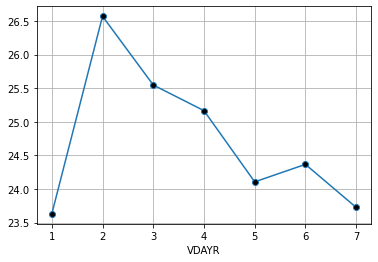

In [14]:
by_day = df["WAITTIME"].groupby(df['VDAYR']).mean()
by_day.plot(linestyle='-', marker='o', markerfacecolor='black', grid=True);

In [15]:
df[df["VDAYR"] == 7]["WAITTIME"].describe()

count    2101.000000
mean       23.727273
std        28.491592
min         1.000000
25%         7.000000
50%        12.000000
75%        28.000000
max       155.000000
Name: WAITTIME, dtype: float64

In [16]:
df[df["VDAYR"] == 6]["WAITTIME"].describe()

count    2102.000000
mean       24.367269
std        28.424708
min         1.000000
25%         8.000000
50%        12.000000
75%        29.000000
max       156.000000
Name: WAITTIME, dtype: float64

In [17]:
df.drop(df.loc[df["ARRTIME"].astype(str).str.len() < 3].index, inplace=True)
df

,VMONTH,VDAYR,ARRTIME,WAITTIME,AGE,AGER,AGEDAYS,RESIDNCE,SEX,ETHUN,...,HLIST,HLISTED,EMEDRES,REGION,MSA,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT
0,6,6,2056,72,27,3,7,1,2,2,...,1,1,1,1,1,3,2017,40100000,4,3723.12641
1,6,2,1417,64,1,1,7,1,1,1,...,1,1,1,1,1,3,2017,40100000,4,3723.12641
2,6,2,2303,7,52,4,7,1,2,2,...,1,1,1,1,1,3,2017,40100000,4,3723.12641
3,6,5,930,29,5,1,7,1,2,2,...,1,1,1,1,1,3,2017,40100000,4,3723.12641
4,6,2,1332,20,4,1,7,1,1,2,...,1,1,1,1,1,3,2017,40100000,4,3723.12641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,7,7,328,8,24,2,7,1,2,2,...,1,1,2,2,1,3,2017,40200000,10,30903.80174
16705,8,1,1707,23,36,3,7,1,1,2,...,1,1,2,2,1,3,2017,40200000,10,30903.80174
16706,7,4,1230,96,40,3,7,1,2,2,...,1,1,2,2,1,3,2017,40200000,10,30903.80174
16707,7,1,235,33,75,6,7,1,1,2,...,1,1,2,2,1,3,2017,40200000,10,30903.80174


In [18]:
df["HOUR"] = df["ARRTIME"].apply(lambda x: int(str(x)[0]) if len(str(x)) == 3 else int(str(x)[:2]))
df["MINUTE"] = df["ARRTIME"].apply(lambda x: int(str(x)[-2:]))

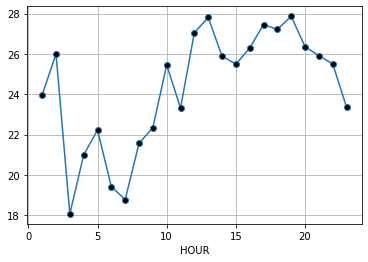

In [19]:
by_hour = df["WAITTIME"].groupby(df['HOUR']).mean()
by_hour.plot(linestyle='-', marker='o', markerfacecolor='black', grid=True);

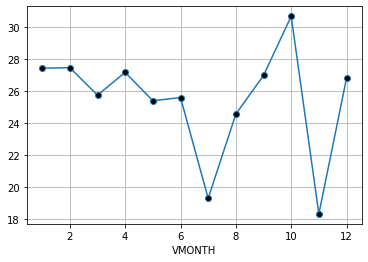

In [20]:
by_month = df["WAITTIME"].groupby(df['VMONTH']).mean()
by_month.plot(linestyle='-', marker='o', markerfacecolor='black', grid=True);

In [21]:
# ["WAITTIME","AGE","TEMPF","SEX","IMMEDR","PAINSCALE"]
feature_cols = ["VMONTH", "VDAYR", "HOUR", "MINUTE", "AGER", "SEX", "IMMEDR", "PAINSCALE", "WAITTIME"]
filtered_df = df[feature_cols]

In [22]:
train_dataset = filtered_df.sample(frac=0.8, random_state=0)
test_dataset = filtered_df.drop(train_dataset.index)

In [23]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('WAITTIME')
test_labels = test_features.pop('WAITTIME')

In [24]:
normalizer = preprocessing.Normalization()

In [25]:
normalizer.adapt(np.array(train_features))

In [26]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [27]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 8)                 17        
_________________________________________________________________
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [ ]:
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2, epochs=100)

Epoch 1/100
298/298 [==============================] - 1s 3ms/step - loss: 19.1453 - val_loss: 18.2301
Epoch 2/100
298/298 [==============================] - 1s 2ms/step - loss: 18.1757 - val_loss: 18.2313

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [ ]:
# ["VMONTH", "VDAYR", "HOUR", "MINUTE", "AGER", "SEX", "IMMEDR", "PAINSCALE", "WAITTIME"]
dnn_model.predict([[6,2,7,10,1,1,6,1]])

